In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(func.strftime("%Y-%m-%d", Measurement.date))).limit(5).all()
latest_date[0][0]

'2017-08-23'

2017-08-23
2016-08-23


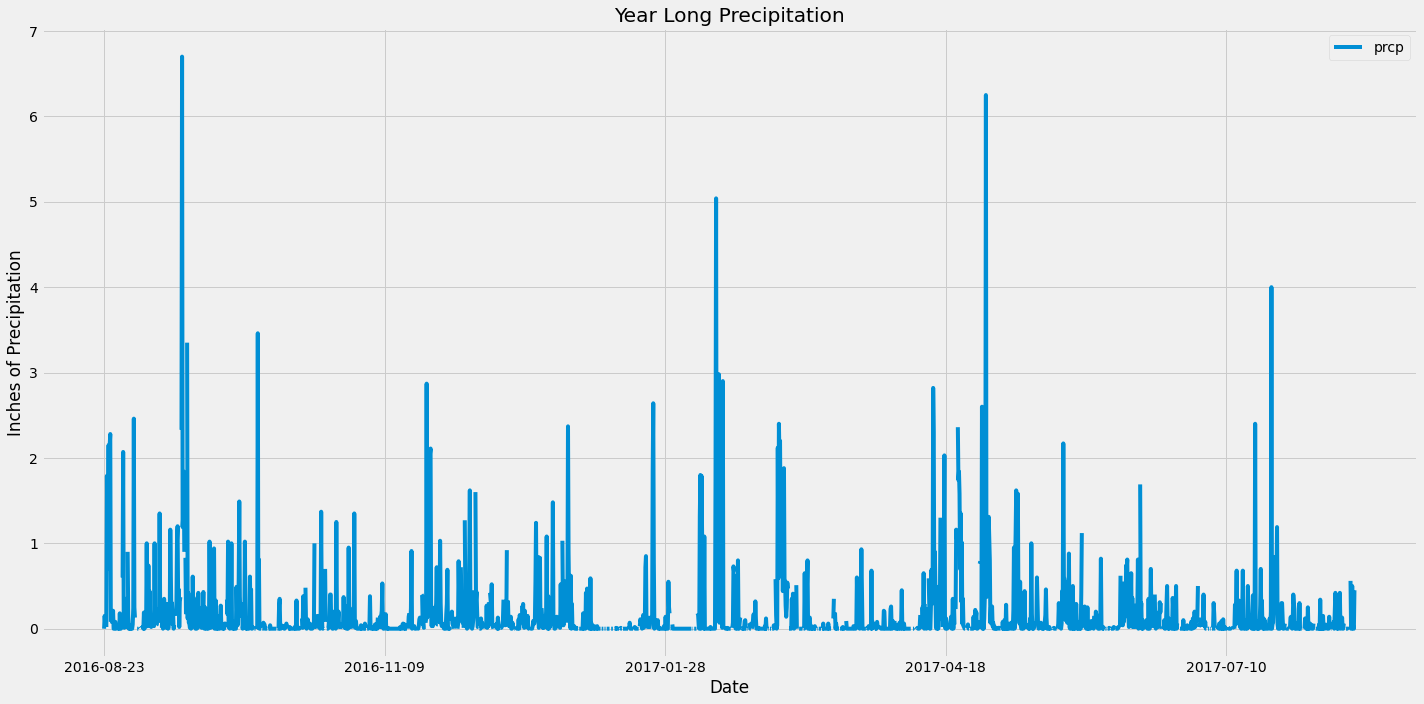

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date = str(most_recent_date)[2:-3]
print(most_recent_date)

# Calculate the date one year from the last date in data set.
last_year = str(eval(most_recent_date[0:4])-1) + most_recent_date[4:]
print(last_year)


# Perform a query to retrieve the data and precipitation scores
last_12months = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year).filter(Measurement.date <= most_recent_date).order_by(Measurement.date).all()

# precip_data = session.query(func.strftime("%y-%m-%d", Measurement.date), Measurement.prcp).\
#     filter(func.strftime("%y-%m-%d", Measurement.date) >= dt.date(2016, 8, 24)).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(data = last_12months)
precip_df.set_index("date", inplace=True)
precip_df.rename(columns={"prcp": "Precipitation"})
# precip_df.head

# Sort the dataframe by date
precip_df = precip_df.sort_values(by='date')
precip_df.head()


# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (20, 10))
precip_df.plot(ax = ax, x_compat = True)


# titles and lables
ax.set_xlabel('Date')
ax.set_ylabel('Inches of Precipitation')
ax.set_title("Year Long Precipitation")

plt.savefig("Images/precipitation.png")

plt.tight_layout()
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
number_of_stations = session.query(Station.station).count()
number_of_stations

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc())

for station in most_active_station:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
highest_station = most_active_station[0][0]
highest_station

top_station_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == highest_station).all()
top_station_stats

[(54.0, 85.0, 71.66378066378067)]

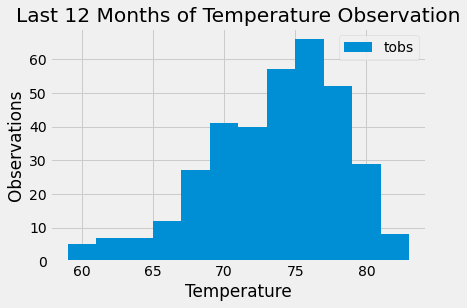

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == highest_station).\
    filter(Measurement.date > last_year).order_by(Measurement.date).all()
temp_df = pd.DataFrame(temp)
temp_df

temp_df.set_index('date')
temp_df.plot.hist(bins = 12)
plt.title("Last 12 Months of Temperature Observation")
plt.xlabel("Temperature")
plt.ylabel("Observations")
plt.savefig("Resources/Station.png")

# Close session

In [ ]:
# Close Session
session.close()